# Morningstar-European-ETFs - Preprocessing

In [104]:
import pandas as pd
import xgboost as xgb
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings

pd.set_option('display.max_rows', None)
warnings.simplefilter(action='ignore', category=FutureWarning)


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [63]:
etf_etf_df_clean = pd.read_csv("Morningstar-European-ETFs.csv")

## 1. Exploratory Data Analysis EDA

In [64]:
etf_etf_df_clean.head()

,ticker,isin,fund_name,inception_date,category,rating,analyst_rating,risk_rating,performance_rating,investment_strategy,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
0,0P00000C5S,CH0008899764,iShares SMI® ETF (CH),1999-10-06,Switzerland Equity,3.0,Negative,3.0,3.0,The Fund aims to achieve a return on your inve...,...,1.45,5.10,10.47,-4.09,4.18,-4.00,-3.96,10.56,15,8
1,0P00000FYY,SE0000693293,XACT OMXS30 UCITS ETF,2000-10-30,Sweden Equity,2.0,NaN,2.0,2.0,The fund is an exchange-traded index fund and ...,...,5.21,11.32,1.66,1.43,4.99,-6.15,-7.21,10.11,16,7
2,0P00000GCE,DE000A0H08N1,iShares STOXX Europe 600 Personal & Household ...,2002-07-08,Sector Equity Consumer Goods & Services,3.0,NaN,3.0,3.0,iShares STOXX Europe 600 Personal & Household ...,...,-1.51,5.34,8.17,6.48,4.83,4.12,-2.03,9.24,17,6
3,0P00000GF2,DE0006289465,iShares eb.rexx® Government Germany UCITS ETF ...,2003-02-04,EUR Government Bond,2.0,NaN,2.0,2.0,iShares eb.rexx Government Germany (DE) is an ...,...,-2.14,4.21,6.04,9.67,0.05,4.96,-3.72,-5.67,13,10
4,0P00000GKU,IE0032523478,iShares € Corp Bond Large Cap UCITS ETF EUR (D...,2003-03-17,EUR Corporate Bond,3.0,NaN,3.0,3.0,The investment objective of this Fund is to pr...,...,-2.74,5.58,6.26,10.55,1.38,3.78,-5.02,-5.84,16,7


In [65]:
etf_etf_df_clean.describe()

,rating,risk_rating,performance_rating,equity_style_score,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
count,5718.000000,5718.000000,5718.000000,5993.000000,5993.000000,5936.000000,5929.000000,5943.000000,5837.000000,5993.000000,...,5474.000000,5376.000000,5146.000000,4960.000000,4781.000000,4627.000000,4490.000000,4309.000000,9495.000000,9495.000000
mean,3.286464,2.939489,3.266527,141.525179,256.714589,16.810612,2.145090,1.675302,10.127321,2.944238,...,3.040190,7.152805,26.587221,4.987581,3.638243,-4.835645,-4.888069,4.138972,10.116904,5.722907
std,1.023322,0.990162,0.997970,43.446994,78.120146,13.775802,2.362469,1.108674,6.487570,1.748887,...,9.006153,6.987913,639.001798,9.700907,8.457587,9.473111,5.010542,10.792686,5.215356,3.579810
min,1.000000,1.000000,1.000000,-51.410000,-325.570000,5.140000,0.100000,0.190000,1.410000,0.000000,...,-55.150000,-72.460000,-61.210000,-44.490000,-49.460000,-67.470000,-28.660000,-57.860000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,124.240000,231.570000,13.340000,1.300000,1.000000,7.470000,1.950000,...,-1.440000,4.100000,4.300000,-0.082500,0.180000,-9.485000,-6.830000,-1.270000,5.000000,3.000000
50%,3.000000,3.000000,3.000000,148.670000,277.400000,15.650000,1.660000,1.330000,9.250000,2.650000,...,3.110000,7.630000,7.520000,4.025000,4.430000,-4.960000,-5.360000,6.330000,11.000000,6.000000
75%,4.000000,4.000000,4.000000,162.110000,299.210000,18.970000,2.560000,2.080000,12.500000,3.550000,...,7.827500,10.940000,10.265000,8.882500,8.560000,0.875000,-2.652500,9.590000,15.000000,8.000000
max,5.000000,5.000000,5.000000,314.820000,424.600000,313.480000,37.920000,9.820000,102.880000,17.210000,...,65.560000,40.770000,30000.540000,81.650000,92.490000,56.010000,42.460000,96.740000,22.000000,20.000000


In [66]:
etf_etf_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Columns: 132 entries, ticker to quarters_down
dtypes: float64(108), int64(2), object(22)
memory usage: 9.6+ MB


In [67]:
etf_etf_df_clean.isnull().sum()

ticker                                    0
isin                                      0
fund_name                                 0
inception_date                            0
category                                  0
rating                                 3777
analyst_rating                         8097
risk_rating                            3777
performance_rating                     3777
investment_strategy                     176
investment_managers                    7430
dividend_frequency                     7641
fund_benchmark                          989
morningstar_benchmark                  2318
equity_style                           3502
equity_style_score                     3502
equity_size                            3502
equity_size_score                      3502
price_prospective_earnings             3559
price_book_ratio                       3566
price_sales_ratio                      3552
price_cash_flow_ratio                  3658
dividend_yield_factor           

## 2. Data Preprocessing

In [71]:
# Selecionando colunas categóricas
categorical_cols = etf_etf_df_clean.select_dtypes(include=['object']).columns.tolist()

# Identificando colunas categóricas com qualquer valor faltante
cols_with_missing_values = [col for col in categorical_cols if etf_etf_df_clean[col].isnull().sum() > 0]

print(f"Antes: {etf_etf_df_clean.shape[1]} colunas")

# Removendo colunas categóricas com valores faltantes
etf_etf_df_clean_clean = etf_etf_df_clean.drop(columns=cols_with_missing_values)
print(f"Depois de remover colunas categóricas com NaNs: {etf_etf_df_clean_clean.shape[1]} colunas")

# Definindo o limite de dados faltantes para 50% do tamanho do dataset
threshold = 0.5  len(etf_etf_df_clean_clean)

# Removendo colunas com mais de 50% de dados faltantes
etf_etf_df_clean_clean = etf_etf_df_clean_clean.dropna(thresh=threshold, axis=1)
print(f"Depois de remover colunas com mais de 50% NaNs: {etf_etf_df_clean_clean.shape[1]} colunas")
print(etf_etf_df_clean_clean.isnull().sum())


Antes: 132 colunas
Depois de remover colunas categóricas com NaNs: 115 colunas
Depois de remover colunas com mais de 50% NaNs: 92 colunas
ticker                                    0
isin                                      0
fund_name                                 0
inception_date                            0
category                                  0
rating                                 3777
risk_rating                            3777
performance_rating                     3777
equity_style_score                     3502
equity_size_score                      3502
price_prospective_earnings             3559
price_book_ratio                       3566
price_sales_ratio                      3552
price_cash_flow_ratio                  3658
dividend_yield_factor                  3502
long_term_projected_earnings_growth    3658
historical_earnings_growth             3585
sales_growth                           3588
cash_flow_growth                       3673
book_value_growth         

In [79]:
# Para colunas setoriais, imputar NaNs com 0, pois o ETF não possui exposição setorial.
sector_columns = [col for col in etf_etf_df_clean_clean.columns if 'sector_' in col]
etf_etf_df_clean_clean[sector_columns] = etf_etf_df_clean_clean[sector_columns].fillna(0)

# Imputando colunas de rating e scores com a moda
rating_cols = ['rating', 'risk_rating', 'performance_rating', 'equity_style_score', 'equity_size_score']
for col in rating_cols:
    if col in etf_etf_df_clean_clean.columns:
        mode_val = etf_etf_df_clean_clean[col].mode()[0]
        etf_etf_df_clean_clean[col].fillna(mode_val, inplace=True)

# Imputando colunas numéricas com a mediana
numeric_cols = [
    'price_prospective_earnings', 'price_book_ratio', 'price_sales_ratio',
    'price_cash_flow_ratio', 'dividend_yield_factor',
    'long_term_projected_earnings_growth', 'historical_earnings_growth',
    'sales_growth', 'cash_flow_growth', 'book_value_growth',
    'roa', 'roe', 'roic'
]
for col in numeric_cols:
    if col in etf_etf_df_clean_clean.columns:
        median_val = etf_etf_df_clean_clean[col].median()
        etf_etf_df_clean_clean[col].fillna(median_val, inplace=True)

# Imputando colunas de envolvimento com 0
involvement_cols = [
    'involvement_abortive_contraceptive', 'involvement_alcohol',
    'involvement_animal_testing', 'involvement_controversial_weapons',
    'involvement_gambling', 'involvement_gmo', 
    'involvement_military_contracting', 'involvement_nuclear',
    'involvement_palm_oil', 'involvement_pesticides',
    'involvement_small_arms', 'involvement_thermal_coal', 'involvement_tobacco'
]
etf_etf_df_clean_clean[involvement_cols] = etf_etf_df_clean_clean[involvement_cols].fillna(0)

# Imputando colunas de tamanho e valor com a mediana
size_value_cols = ['nav_per_share', 'shareclass_size', 'fund_size']
for col in size_value_cols:
    if col in etf_etf_df_clean_clean.columns:
        median_val = etf_etf_df_clean_clean[col].median()
        etf_etf_df_clean_clean[col].fillna(median_val, inplace=True)

# Imputar com zero para colunas de capitalização de mercado
market_cap_cols = ['market_cap_giant', 'market_cap_large', 'market_cap_medium', 'market_cap_small', 'market_cap_micro']
etf_etf_df_clean_clean[market_cap_cols] = etf_etf_df_clean_clean[market_cap_cols].fillna(0)

# Imputar com mediana para custos associados ao ETF
cost_cols = ['ongoing_cost', 'management_fees']
for col in cost_cols:
    if col in etf_etf_df_clean_clean.columns:
        median_val = etf_etf_df_clean_clean[col].median()
        etf_etf_df_clean_clean[col].fillna(median_val, inplace=True)

# Imputar com zero para métricas de sustentabilidade
sustainability_cols = ['environmental_score', 'social_score', 'governance_score', 'sustainability_score']
etf_etf_df_clean_clean[sustainability_cols] = etf_etf_df_clean_clean[sustainability_cols].fillna(0)

# Excluir colunas de ranking de sustentabilidade
etf_etf_df_clean_clean.drop(['sustainability_rank', 'sustainability_percentage_rank'], axis=1, inplace=True, errors='ignore')


In [80]:
print(etf_etf_df_clean_clean.isnull().sum())

ticker                                    0
isin                                      0
fund_name                                 0
inception_date                            0
category                                  0
rating                                    0
risk_rating                               0
performance_rating                        0
equity_style_score                        0
equity_size_score                         0
price_prospective_earnings                0
price_book_ratio                          0
price_sales_ratio                         0
price_cash_flow_ratio                     0
dividend_yield_factor                     0
long_term_projected_earnings_growth       0
historical_earnings_growth                0
sales_growth                              0
cash_flow_growth                          0
book_value_growth                         0
roa                                       0
roe                                       0
roic                            

In [81]:
# Lista das colunas de retorno dos fundos
fund_return_cols = [
    'fund_trailing_return_ytd',
    'fund_trailing_return_3years',
    'fund_trailing_return_5years',
    'fund_return_2019',
    'fund_return_2018',
    'fund_return_2017',
    'fund_return_2016',
    'fund_return_2020_q3',
    'fund_return_2020_q2',
    'fund_return_2020_q1',
    'fund_return_2019_q4',
    'fund_return_2019_q3',
    'fund_return_2019_q2',
    'fund_return_2019_q1',
    'fund_return_2018_q4',
    'fund_return_2018_q3',
    'fund_return_2018_q2',
    'fund_return_2018_q1',
    'fund_return_2017_q4',
    'fund_return_2017_q3',
    'fund_return_2017_q2',
    'fund_return_2017_q1',
    'fund_return_2016_q4',
    'fund_return_2016_q3',
    'fund_return_2016_q2',
    'fund_return_2016_q1',
    'fund_return_2015_q4'
]

# Excluindo linhas que contêm NaN em qualquer uma das colunas de retorno dos fundos
etf_etf_df_clean_clean = etf_etf_df_clean_clean.dropna(subset=fund_return_cols)

# Imprimindo o número de linhas após a exclusão
print(f"Total de linhas após exclusão: {etf_etf_df_clean_clean.shape[0]}")


Total de linhas após exclusão: 4675


In [86]:
etf_etf_df_clean_clean.head()

,ticker,isin,fund_name,inception_date,category,rating,risk_rating,performance_rating,equity_style_score,equity_size_score,...,fund_return_2017_q3,fund_return_2017_q2,fund_return_2017_q1,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,quarters_up,quarters_down
0,0P00000C5S,CH0008899764,iShares SMI® ETF (CH),1999-10-06,Switzerland Equity,3.0,3.0,3.0,161.43,328.15,...,-1.55,5.14,7.04,1.45,5.10,10.47,-4.09,4.18,15,8
1,0P00000FYY,SE0000693293,XACT OMXS30 UCITS ETF,2000-10-30,Sweden Equity,2.0,2.0,2.0,154.89,248.09,...,2.17,4.14,7.05,5.21,11.32,1.66,1.43,4.99,16,7
2,0P00000GCE,DE000A0H08N1,iShares STOXX Europe 600 Personal & Household ...,2002-07-08,Sector Equity Consumer Goods & Services,3.0,3.0,3.0,165.71,308.52,...,-0.58,2.85,13.40,-1.51,5.34,8.17,6.48,4.83,17,6
3,0P00000GF2,DE0006289465,iShares eb.rexx® Government Germany UCITS ETF ...,2003-02-04,EUR Government Bond,2.0,2.0,2.0,158.64,301.04,...,0.84,1.73,-0.25,-2.14,4.21,6.04,9.67,0.05,13,10
4,0P00000GKU,IE0032523478,iShares € Corp Bond Large Cap UCITS ETF EUR (D...,2003-03-17,EUR Corporate Bond,3.0,3.0,3.0,158.64,301.04,...,1.33,2.90,0.05,-2.74,5.58,6.26,10.55,1.38,16,7


In [87]:
print(etf_etf_df_clean_clean.isnull().sum())

ticker                                 0
isin                                   0
fund_name                              0
inception_date                         0
category                               0
rating                                 0
risk_rating                            0
performance_rating                     0
equity_style_score                     0
equity_size_score                      0
price_prospective_earnings             0
price_book_ratio                       0
price_sales_ratio                      0
price_cash_flow_ratio                  0
dividend_yield_factor                  0
long_term_projected_earnings_growth    0
historical_earnings_growth             0
sales_growth                           0
cash_flow_growth                       0
book_value_growth                      0
roa                                    0
roe                                    0
roic                                   0
asset_stock                            0
asset_bond      

In [88]:
# Salvando o DataFrame processado em um arquivo CSV
etf_etf_df_clean_clean.to_csv('Morningstar-European-ETFs-Processed.csv', index=False)

## 3. Feature importance Analysis

In [100]:
# Calcular a correlação de Pearson em relação ao target (risk_rating)
etf_etf_df_clean_clean = pd.read_csv("Morningstar-European-ETFs-Processed.csv")
correlations = etf_etf_df_clean_clean.corr(method='pearson')['risk_rating'].sort_values(ascending=False)
print(correlations)

risk_rating                            1.000000
fund_return_2020_q2                    0.177766
dividend_yield_factor                  0.172399
sector_financial_services              0.135569
market_cap_small                       0.118662
fund_return_2016_q3                    0.117305
ongoing_cost                           0.104133
quarters_down                          0.098402
fund_return_2017_q3                    0.095837
sector_consumer_cyclical               0.083881
sector_basic_materials                 0.078741
involvement_pesticides                 0.073387
market_cap_medium                      0.072764
fund_return_2019_q4                    0.072583
long_term_projected_earnings_growth    0.072378
management_fees                        0.071005
fund_return_2016_q1                    0.069588
fund_return_2016_q4                    0.066552
fund_return_2019_q2                    0.060045
fund_return_2019                       0.055787
sustainability_score                   0

In [101]:
# 1. Codificação One-Hot
etf_etf_df_clean_clean = pd.get_dummies(etf_etf_df_clean_clean)

# Dividir os dados em treinamento e teste
X = etf_etf_df_clean_clean.drop('risk_rating', axis=1)
y = etf_etf_df_clean_clean['risk_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Obter a importância das características
feature_importances = model_rf.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(features)


                                                Feature  Importance
64                                  fund_return_2020_q1    0.112523
0                                                rating    0.090830
24                            sector_consumer_defensive    0.053694
1                                    performance_rating    0.048972
33                                         ongoing_cost    0.040701
4                            price_prospective_earnings    0.029513
46                                  involvement_nuclear    0.022286
77                                  fund_return_2016_q4    0.016615
55                             fund_trailing_return_ytd    0.014857
70                                  fund_return_2018_q3    0.014748
26                                   sector_industrials    0.014391
9                   long_term_projected_earnings_growth    0.014164
49                               involvement_small_arms    0.014006
59                                     fund_retu

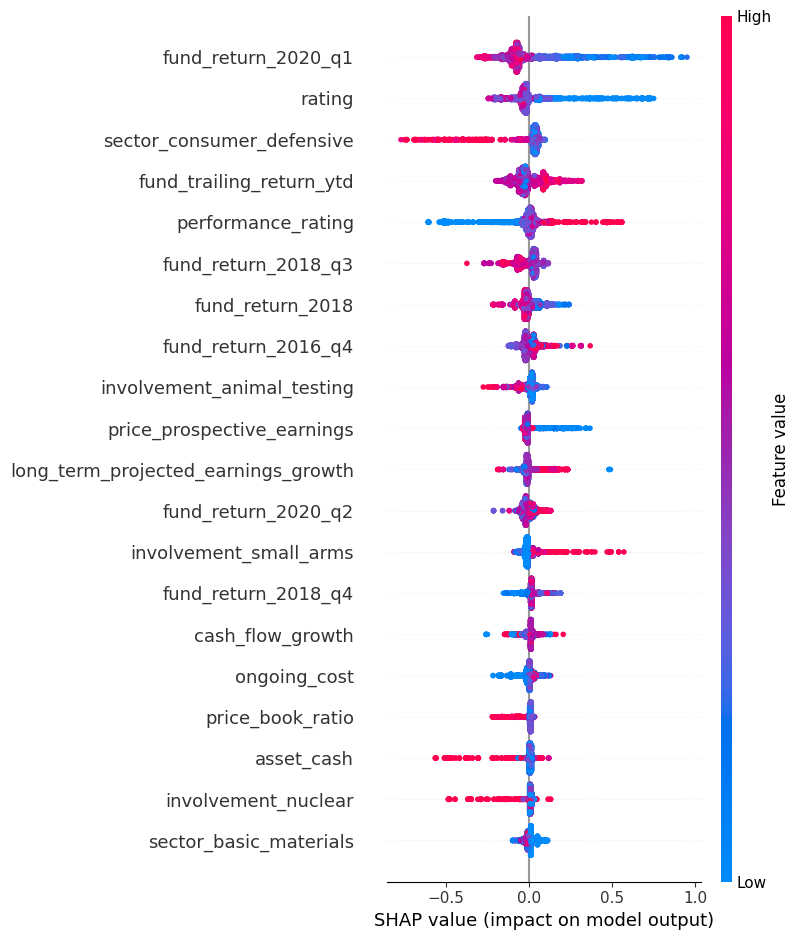

In [105]:
# Treinar o modelo XGBoost
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

# Usar SHAP para decompor a importância das características
explainer = shap.Explainer(model_xgb)
shap_values = explainer.shap_values(X_train)

# Visualizar a importância das características com SHAP
shap.summary_plot(shap_values, X_train)


In [116]:
# Lista das colunas
cols = [
    'risk_rating',
    'fund_return_2020_q1',
    'rating',
    'sector_consumer_defensive',
    'fund_trailing_return_ytd',
    'performance_rating',
    'fund_return_2018_q3',
    'fund_return_2018',
    'fund_return_2016_q4',
    'involvement_animal_testing',
    'price_prospective_earnings'
]

# Dicionário de descrições (para melhorar os prints)
descriptions = {
    'risk_rating': 'Classificação de risco do ETF.',
    'fund_return_2020_q1': 'Retorno do fundo no primeiro trimestre de 2020.',
    'rating': 'Classificação geral do ETF.',
    'sector_consumer_defensive': 'Exposição do ETF ao setor de consumo defensivo.',
    'fund_trailing_return_ytd': 'Retorno acumulado do fundo no ano até a data.',
    'performance_rating': 'Classificação de performance do ETF.',
    'fund_return_2018_q3': 'Retorno do fundo no terceiro trimestre de 2018.',
    'fund_return_2018': 'Retorno total do fundo em 2018.',
    'fund_return_2016_q4': 'Retorno do fundo no quarto trimestre de 2016.',
    'involvement_animal_testing': 'Envolvimento do ETF em testes em animais.',
    'price_prospective_earnings': 'Relação preço/perspectiva de ganhos do ETF.'
}

for col in cols:
    print(f" Coluna: {col}")
    print(f"   - Representa: {descriptions[col]}")
    print(f"   - Tipo de dados: {etf_df_clean[col].dtype}")
    print(f"   - Valores válidos: (Baseie-se no conhecimento do domínio ou na documentação disponível sobre os dados.)")
    print(f"   - Valores distintos: {etf_df_clean[col].nunique()}")
    print(f"   - Menor e maior valor: {etf_df_clean[col].min()} e {etf_df_clean[col].max()}")
    print(f"   - Moda: {etf_df_clean[col].mode().iloc[0]}")  
    print(f"   - Média: {etf_df_clean[col].mean():.2f}")  
    print(f"   - Desvio-padrão: {etf_df_clean[col].std():.2f}")  
    print(f"   - Mediana: {etf_df_clean[col].median()}")
    print("\n")  # Espaçamento entre colunas


 Coluna: risk_rating
   - Representa: Classificação de risco do ETF.
   - Tipo de dados: float64
   - Valores válidos: (Baseie-se no conhecimento do domínio ou na documentação disponível sobre os dados.)
   - Valores distintos: 5
   - Menor e maior valor: 1.0 e 5.0
   - Moda: 3.0
   - Média: 2.97
   - Desvio-padrão: 0.86
   - Mediana: 3.0


 Coluna: fund_return_2020_q1
   - Representa: Retorno do fundo no primeiro trimestre de 2020.
   - Tipo de dados: float64
   - Valores válidos: (Baseie-se no conhecimento do domínio ou na documentação disponível sobre os dados.)
   - Valores distintos: 2773
   - Menor e maior valor: -91.84 e 157.17
   - Moda: 4.44
   - Média: -12.80
   - Desvio-padrão: 19.22
   - Mediana: -14.86


 Coluna: rating
   - Representa: Classificação geral do ETF.
   - Tipo de dados: float64
   - Valores válidos: (Baseie-se no conhecimento do domínio ou na documentação disponível sobre os dados.)
   - Valores distintos: 5
   - Menor e maior valor: 1.0 e 5.0
   - Moda: 3.0
